In [99]:
import pandas as pd # Импортируем библ. для работы с данными
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
random_state=69

## По поводу тестового: задания как такового нет, дали свободу творчеству.
## Дано: таблица действий клиентов наземных сетей бк.

Раздел предобработки данных 

In [ ]:
df = pd.read_excel('./drive/MyDrive/Colab_Notebooks/DATA/Новички_задание_v2.xlsx')

In [ ]:
df.sample(5)

,ID,Проигрыш (первое посещение),IN (первое посещение),Ставки за бонусы (первое посещение),Депозит (первое посещение),вывод средств (первое посещение),"№ клуба, который посетил в первый день регистрации в сети",1 day (день регистрации),2 day (день второго визита в клуб),max day (дата последнего визита),"Кол-во визитов (за все время, не считая 1й визит)",Проигрыш за все визиты,Ожидаемый проигрыш
63683,2457135837,-310.0,232.5,250,0.0,310.0,1808,44096,44130.0,44203.0,12,52002.5,22539.0553
14302,2457645052,2160.0,3720.0,0,2160.0,0.0,102,44031,NaN,NaN,0,0.0,0.0000
25611,2437798270,1007.5,1162.5,0,1007.5,0.0,1532,44036,NaN,NaN,0,0.0,0.0000
21660,2454503587,1200.0,1200.0,250,1200.0,0.0,1638,44086,44094.0,44103.0,2,2400.0,441.1860
27748,2435515077,600.0,780.0,500,600.0,0.0,1756,44194,44195.0,44195.0,1,12000.0,23261.1600


In [ ]:
df.columns 

Index(['ID', 'Проигрыш (первое посещение)', 'IN (первое посещение)',
       'Ставки за бонусы (первое посещение)', 'Депозит (первое посещение)',
       'вывод средств (первое посещение)',
       '№ клуба, который посетил в первый день регистрации в сети',
       '1 day (день регистрации)', '2 day (день второго визита в клуб)',
       'max day (дата последнего визита)',
       'Кол-во визитов (за все время, не считая 1й визит)',
       'Проигрыш за все визиты', 'Ожидаемый проигрыш'],
      dtype='object')

In [ ]:
df.rename({ #Пооменяем название колонок для удобства в дальнейшем анализе
    'Проигрыш (первое посещение)': 'Loss_1st', 'IN (первое посещение)': 'IN_1st', 'Ставки за бонусы (первое посещение)':'Bet_Bonus_1st',
    'Депозит (первое посещение)': 'Deposit_1st', 'вывод средств (первое посещение)': 'withdrawal_1st', '№ клуба, который посетил в первый день регистрации в сети':'ID_club_1st',
    '1 day (день регистрации)':'1st_visit_day', '2 day (день второго визита в клуб)': '2nd_visit_day','max day (дата последнего визита)':'last_visit_day',
    'Кол-во визитов (за все время, не считая 1й визит)':'visits_count','Проигрыш за все визиты':'Loss_all','Ожидаемый проигрыш':'Loss_expected'
    }, axis='columns', inplace=True)

In [ ]:
df.columns

Index(['ID', 'Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st',
       'withdrawal_1st', 'ID_club_1st', '1st_visit_day', '2nd_visit_day',
       'last_visit_day', 'visits_count', 'Loss_all', 'Loss_expected'],
      dtype='object')

In [ ]:
df.isnull().sum() # С первого взгляда видно, что данные без пропусков, а если таковые присутствуют, так как клиенты больше не возвращались

ID                    0
Loss_1st              0
IN_1st                0
Bet_Bonus_1st         0
Deposit_1st           0
withdrawal_1st        0
ID_club_1st           0
1st_visit_day         0
2nd_visit_day     47607
last_visit_day    47607
visits_count          0
Loss_all              0
Loss_expected         0
dtype: int64

In [ ]:
df['ID'].drop_duplicates().shape
# в нашей таблице нет дуликатов

(83038,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83038 entries, 0 to 83037
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              83038 non-null  int64  
 1   Loss_1st        83038 non-null  float64
 2   IN_1st          83038 non-null  float64
 3   Bet_Bonus_1st   83038 non-null  int64  
 4   Deposit_1st     83038 non-null  float64
 5   withdrawal_1st  83038 non-null  float64
 6   ID_club_1st     83038 non-null  object 
 7   1st_visit_day   83038 non-null  int64  
 8   2nd_visit_day   35431 non-null  float64
 9   last_visit_day  35431 non-null  float64
 10  visits_count    83038 non-null  int64  
 11  Loss_all        83038 non-null  float64
 12  Loss_expected   83038 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 8.2+ MB


In [ ]:
# Избавимся от выбросов
cols = ['Deposit_1st', 'Loss_1st', 'IN_1st', 'withdrawal_1st', 'visits_count', 'Loss_all', 'Loss_expected']

for col in cols:
    q1 = df[col].quantile(0.01)
    q3 = df[col].quantile(0.99)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [ ]:
df.shape

(82046, 13)

In [ ]:
# Округлим значения и затем поменям формат данных на int в колонках ниже
df[['Loss_1st', 'IN_1st', 'withdrawal_1st', 'Deposit_1st', 'Loss_all']].round().astype(int);

In [ ]:
df['ID_club_1st'].astype(str); # id клуба приведем к str

In [ ]:
df['ID_club_1st'].str.count('[,.]').gt(0).sum()
# В нашей таблице присутствуют 57 клиентов , которые зарегестрированы в нескольких клуба(не критическая масса, в дальнейшей работе не будем учитывать их отдельно)

53

In [ ]:
# Добавим новую колонку со средним кол-во дней между визитами
df['avg_days'] = 0

# Для клиентов с одним визитом оставляем значение 0
df.loc[df['visits_count'] == 1, 'avg_days'] = 0

# Для клиентов с двумя визитами вычисляем среднее между первым и последним визитом
df.loc[df['visits_count'] == 2, 'avg_days'] = \
    (df['last_visit_day'] - df['1st_visit_day']) / 2

# Для клиентов с тремя и более визитами вычисляем разницу между первым и последним визитами и делим на количество визитов - 1
df.loc[df['visits_count'] >= 3, 'avg_days'] = \
    (df['last_visit_day'] - df['1st_visit_day']) / (df['visits_count'] - 1)

In [ ]:
df['avg_days'].round(1)

148       0.0
150       0.0
152       4.4
154       4.7
156      70.0
         ... 
82924     0.0
82928     9.2
82932     0.0
82934     2.8
82940     7.5
Name: avg_days, Length: 82046, dtype: float64

In [ ]:
# Преобразуем значения колонок 1st_visit_day , 2nd_visit_day,last_visit_day в формат даты
# Импортируем модуль datetime для работы с датами
from datetime import datetime

# Преобразуем значения в колонках 1st_visit_day , 2nd_visit_day, last_visit_day в формат даты
df['1st_visit_day'] = pd.to_datetime(df['1st_visit_day'], unit='D', origin=pd.Timestamp('1900-01-01'))
df['2nd_visit_day'] = pd.to_datetime(df['2nd_visit_day'], unit='D', origin=pd.Timestamp('1900-01-01'),errors='ignore')
df['last_visit_day'] = pd.to_datetime(df['last_visit_day'], unit='D', origin=pd.Timestamp('1900-01-01'),errors='ignore')

In [ ]:
df[['1st_visit_day','2nd_visit_day', 'last_visit_day']].sample(4)

,1st_visit_day,2nd_visit_day,last_visit_day
15892,2020-08-11,2020-09-21,2020-09-21
57236,2020-11-27,NaT,NaT
46824,2020-11-06,2020-11-07,2021-03-07
47611,2020-07-27,NaT,NaT


In [ ]:
# заполними пропуски в '2nd_visit_day' и 'last_visit_day' нулем
df[['2nd_visit_day', 'last_visit_day']] = df[['2nd_visit_day', 'last_visit_day']].fillna(0)

In [ ]:
df['1st_visit_day'].max() - df['1st_visit_day'].min()
# Данные находятся во временном отрезке в 253 дня

Timedelta('253 days 00:00:00')

In [ ]:
df.loc[df['visits_count'] == 0, 'ID'].count()
# в данных содержатся 47428 клинеты с 0 значением в visits_count

47428

In [ ]:
# Исправим их на 1, т.к. они уже совершили регистрацию
df.loc[df['visits_count'] == 0, 'visits_count'] = 1

In [ ]:
df.loc[(df['visits_count'] == 1) & (df['last_visit_day'] == 0)]['ID'].count()
# У них отсутствуют значения в last_visit_day, добавим значения из 1st_visit_day 

47428

In [ ]:
df.loc[(df['visits_count'] == 1) & (df['last_visit_day'] == 0), 'last_visit_day'] = df.loc[(df['visits_count'] == 1) & (df['last_visit_day'] == 0), '1st_visit_day']

In [ ]:
# Посмотрим на наши данные после всех преобразований
df.round(1).sample(5)

,ID,Loss_1st,IN_1st,Bet_Bonus_1st,Deposit_1st,withdrawal_1st,ID_club_1st,1st_visit_day,2nd_visit_day,last_visit_day,visits_count,Loss_all,Loss_expected,avg_days
78839,2432594138,-5086.9,1085.0,1000,1550.0,0.0,1760,2021-03-12,2021-03-13 00:00:00,2021-03-14 00:00:00,2,-7103.5,201.5,1.0
42691,2432117674,0.0,0.0,300,0.0,0.0,1774,2020-11-30,0,2020-11-30 00:00:00,1,0.0,0.0,0.0
74386,2438536748,-1513.2,1560.0,0,1560.0,0.0,1427,2020-08-25,2020-09-01 00:00:00,2020-09-09 00:00:00,2,3000.0,300.0,7.5
76912,2457587340,-2400.0,2520.0,0,600.0,3000.0,1517,2020-07-03,0,2020-07-03 00:00:00,1,0.0,0.0,0.0
58554,2460398377,0.0,180.0,350,0.0,0.0,1670,2020-11-03,0,2020-11-03 00:00:00,1,0.0,0.0,0.0


In [ ]:
df.columns

Index(['ID', 'Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st',
       'withdrawal_1st', 'ID_club_1st', '1st_visit_day', '2nd_visit_day',
       'last_visit_day', 'visits_count', 'Loss_all', 'Loss_expected',
       'avg_days'],
      dtype='object')

В следующем разделе рассчитаем базовые бизнес-метрик. Такие как средний чек, средний проигрыш за первое посещение,Средний доход от одного посетителя
 и т.д.
Построем графики распределения и попробуем сделать промежуточные выводы.

In [ ]:
# Average revenue per user (ARPU) - средний доход, полученный от каждого клиента из этой таблицы
arpu = df["Loss_all"].sum() / df["ID"].nunique()
arpu ## Коэф. при исходном кол-ве данных дает значение примерно 11000, весомо(в этом анализе я предпочел презентабельности вместо точности)

7120.663807912635

In [ ]:
# Я бы хотел начать с малого.Так как мы работаем с даннами наземных сетей бк, 
# то сперва давайте посмотрим распределения доходов, привлекатеьности и тп. по КЛУБАМ.
# Возможно для нас это не так важно, и можно было бы опустить этот фактор, т.к.
# из-за нехватки данных , что то более чем "топ-5 клубов по доходу" отсюда извлечь неполучится. 
# Но все же может ребятам из соседнего отдела эта информации окажется кстати.Для апперетива самое то.

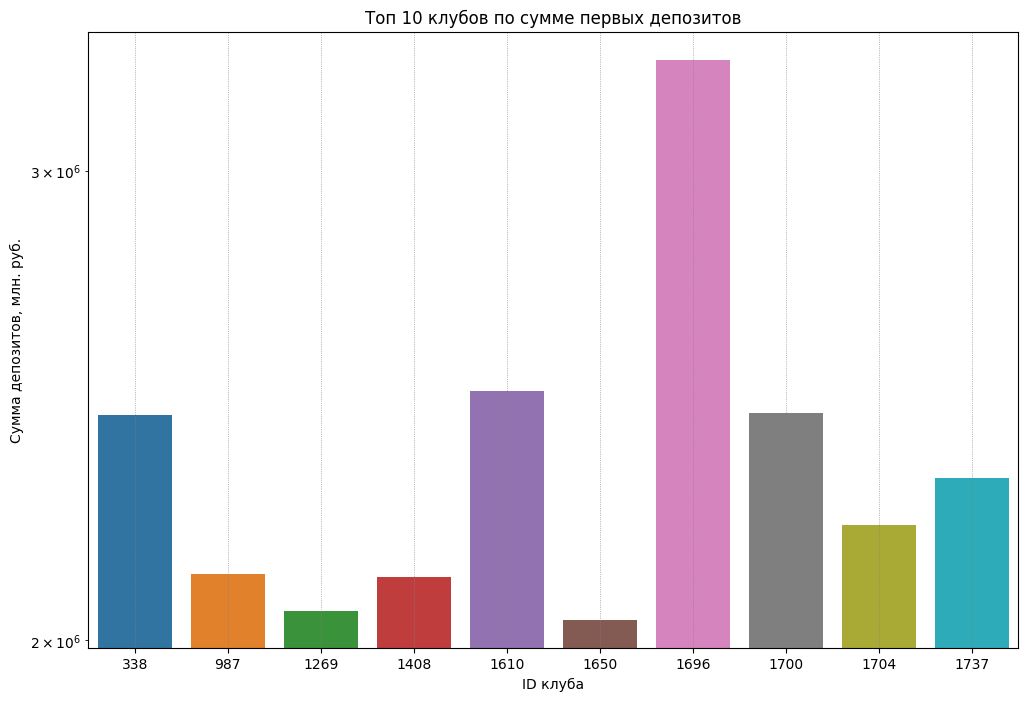

In [ ]:
top_10_deposit = df.groupby('ID_club_1st').agg({'Deposit_1st': 'sum'}).sort_values('Deposit_1st', ascending=False).head(10)
plt.figure(figsize=(12,8))
ax =sns.barplot(x=top_10_deposit.index, y=top_10_deposit['Deposit_1st'])
plt.xlabel('ID клуба')
plt.ylabel('Сумма депозитов, млн. руб.')
plt.title('Топ 10 клубов по сумме первых депозитов')
ax.grid(color='gray', linestyle=':', linewidth=0.5)
plt.yscale('log')
plt.show()

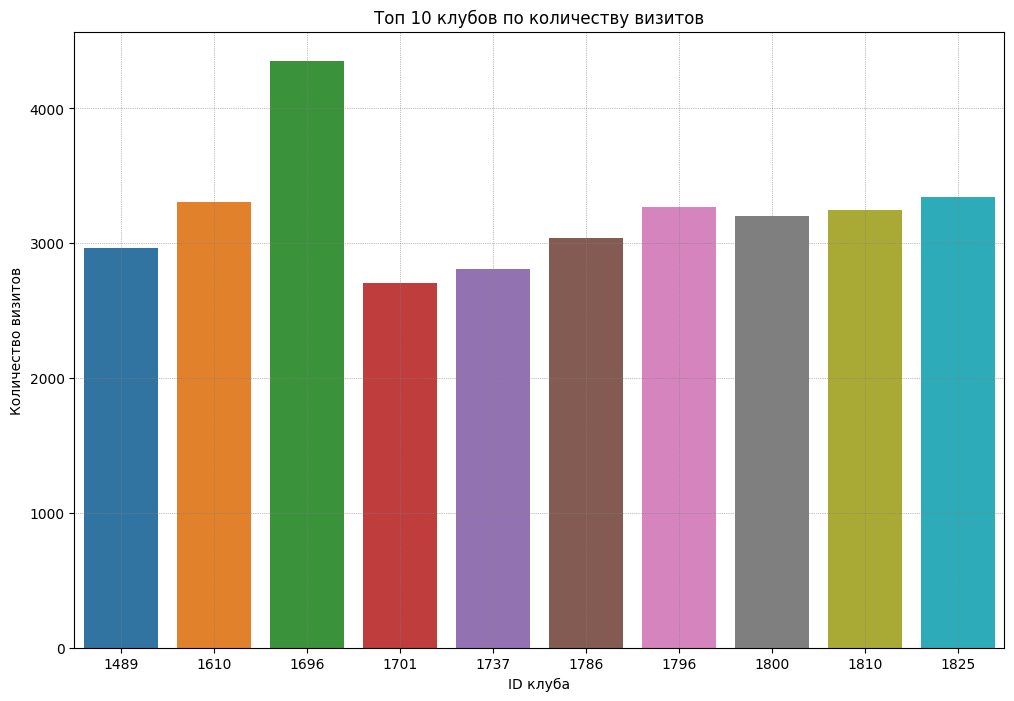

In [ ]:
top_10_visits = df.groupby('ID_club_1st').agg({'visits_count': 'sum'}).sort_values('visits_count', ascending=False).head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=top_10_visits.index, y=top_10_visits['visits_count'])
plt.xlabel('ID клуба')
plt.ylabel('Количество визитов')
plt.title('Топ 10 клубов по количеству визитов')
ax.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

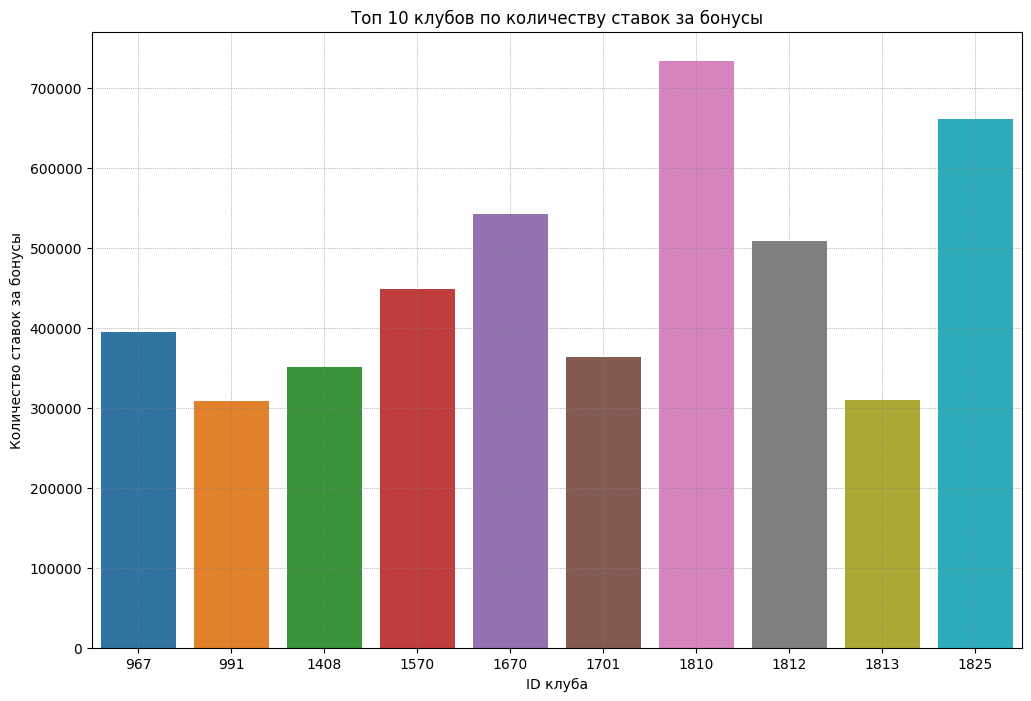

In [ ]:
top_10_bet_bonus = df.groupby('ID_club_1st').agg({'Bet_Bonus_1st': 'sum'}).sort_values('Bet_Bonus_1st', ascending=False).head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=top_10_bet_bonus.index, y=top_10_bet_bonus['Bet_Bonus_1st'])
plt.xlabel('ID клуба')
plt.ylabel('Количество ставок за бонусы')
plt.title('Топ 10 клубов по количеству ставок за бонусы')
ax.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

In [ ]:
#Завершим тему клубов в этом анализе, теперь давайте посмотрим уже наконец на распределение основных показателе и посчитаем нужные нам метрики

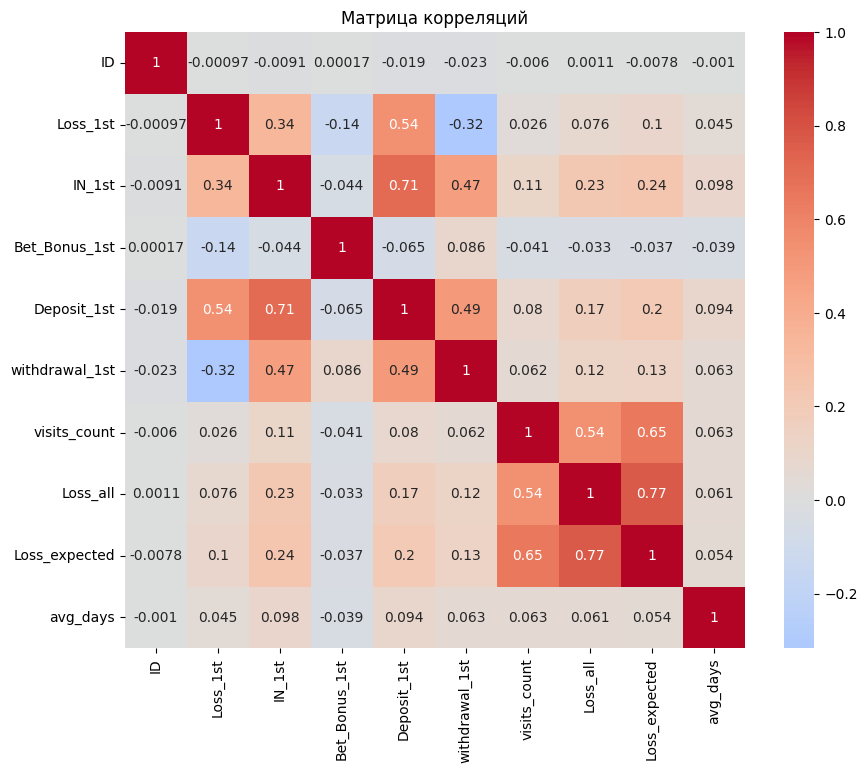

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

In [ ]:
# Из матрицы корреляции отметим сперва самые сильные связи 
# Deposit_1st и IN_1st - что логично, 
# Loss_all и Loss_expected - видимо модель предсказывания хорошо настроина,
# Deposit_1st и Loss_1st коеф. корр. высок
# Также есть корр. visit_counts и Loss_all
# Давайте рассмотрим отдельно коррелированые фичи

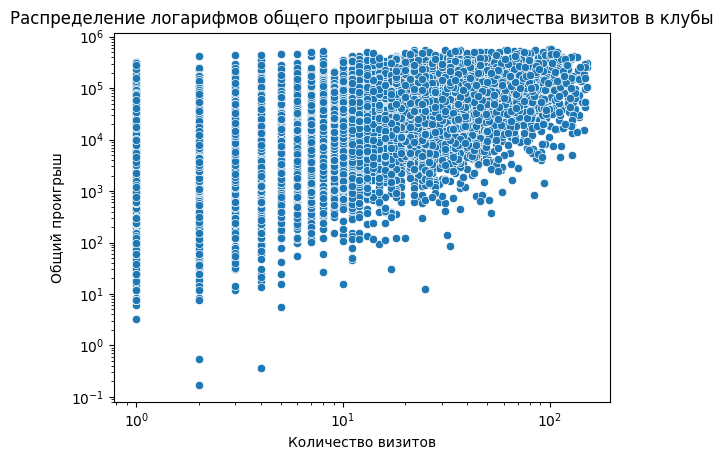

In [ ]:
sns.scatterplot(data=df, x='visits_count', y='Loss_all')
plt.xlabel('Количество визитов')
plt.ylabel('Общий проигрыш')
plt.yscale('log')
plt.xscale('log')
plt.title('Распределениe логарифмов общего проигрыша от количества визитов в клубы')
plt.show()
# Мы можем заметить, что график имеет логарифмическую форму, что говорит о том, корр. между признакими положительная
# что увеличение количества визитов в клуб ведет к более быстрому росту общего проигрыша.

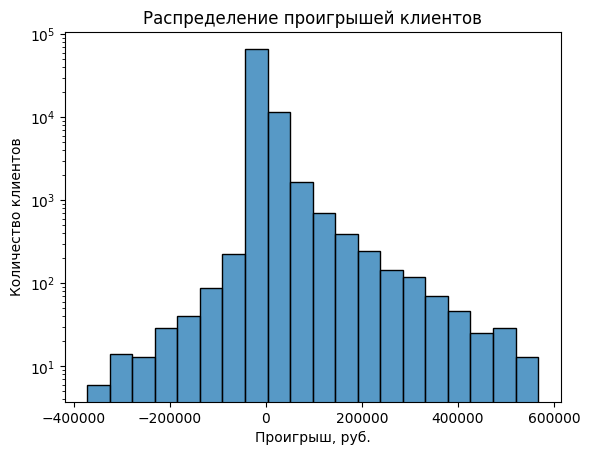

In [ ]:
# создаем график
sns.histplot(data=df, x="Loss_all", bins=20)

# добавляем заголовок и подписи осей
plt.title("Распределение проигрышей клиентов")
plt.xlabel("Проигрыш, руб.")
plt.ylabel("Количество клиентов")
plt.yscale('log')
plt.yscale('log')
# отображаем график
plt.show()
# снова используем логариф обоих параметров для презентабельности,
# Распр. имеет схожесть к  нормальному , можно применить тест на нормальность, но пока это не важно.
# Можно заметить что самое большое кол-во клиентов имеет отриц. Loss_all , возможно
# клиенты после выигрыша в первые дни просто выносят деньги из аккаунта , но также 
# если клиент останется то скорее всего попадет под категорию клиентов справой стороны распределения.

In [ ]:
# Исходя из данных, я бы делал бы уклон в нашем анализе в направлении влияние фактора Bet_bonus,
# а имеено как он влияет на посещаемость, депозит и тд.
# В дальнейшем выполним когортный анализ и посмотрим разницу между временными когортами клиентов 
# кто использовал Bet_bonus и тех кто не использовал, затем сравним частоту их визитов, 
# и сделаем вывод важен ли Bet_bonus для удержания клиентов.

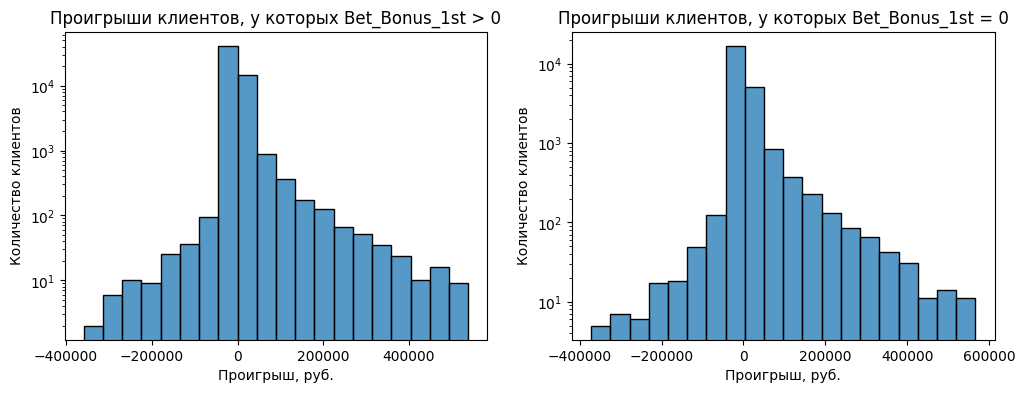

In [ ]:
# создаем два объекта Axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# график для Bet_Bonus_1st > 0
sns.histplot(data=df[df['Bet_Bonus_1st'] > 0], x="Loss_all", bins=20, ax=ax1)
ax1.set_title("Проигрыши клиентов, у которых Bet_Bonus_1st > 0")
ax1.set_xlabel("Проигрыш, руб.")
ax1.set_ylabel("Количество клиентов")
ax1.set_yscale('log')

# график для Bet_Bonus_1st = 0
sns.histplot(data=df[df['Bet_Bonus_1st'] == 0], x="Loss_all", bins=20, ax=ax2)
ax2.set_title("Проигрыши клиентов, у которых Bet_Bonus_1st = 0")
ax2.set_xlabel("Проигрыш, руб.")
ax2.set_ylabel("Количество клиентов")
ax2.set_yscale('log')

# отображаем графики
plt.show()
# Получились одинаковые распределения. Посмотрим как они будут себя вести от размера бонуса

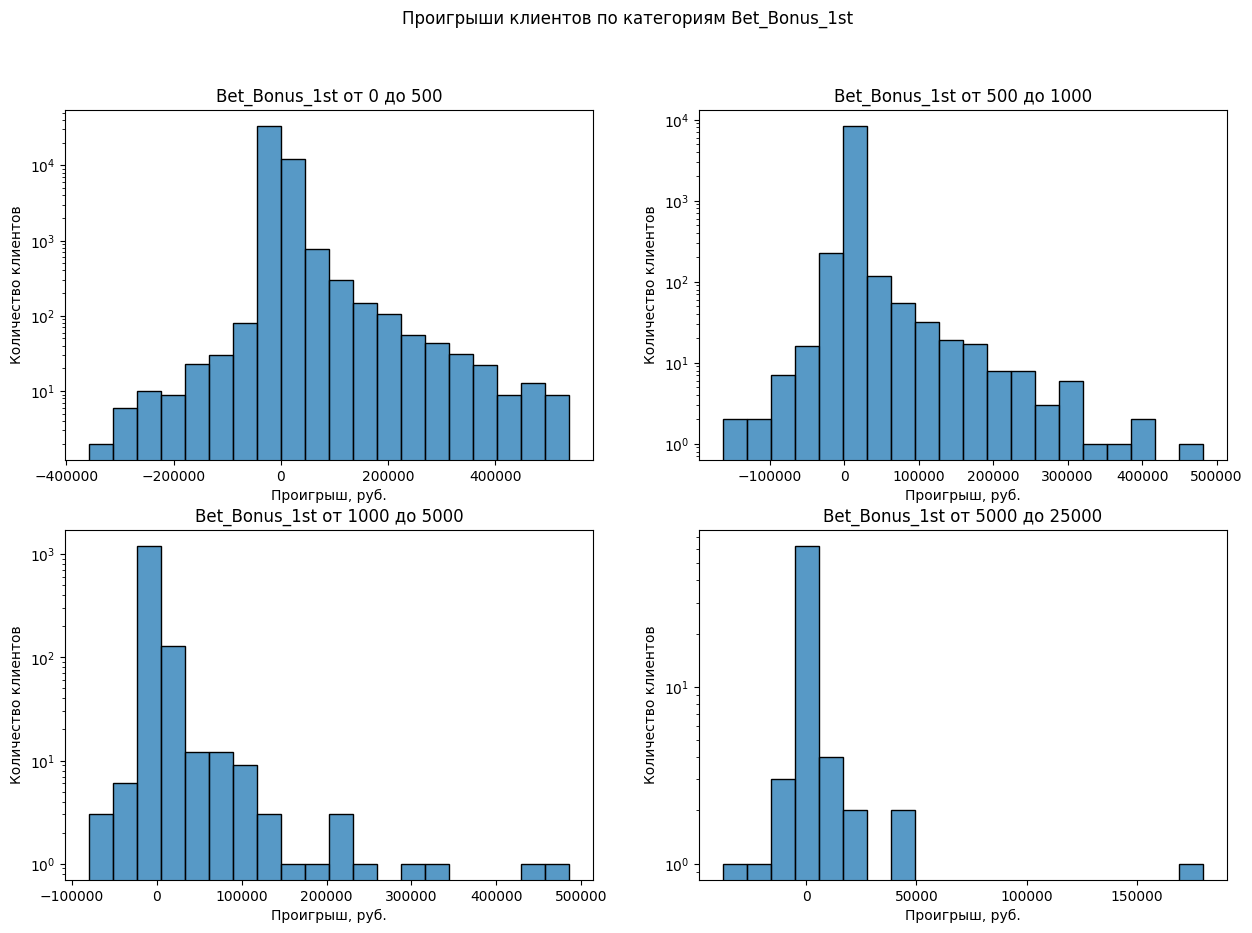

In [ ]:
# список категорий для Bet_Bonus_1st
bon_cats = [(0, 500), (500, 1000), (1000, 5000), (5000, 25000)]

# создаем объекты Figure и Axes для каждой категории
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle("Проигрыши клиентов по категориям Bet_Bonus_1st")
axes = axes.flatten()

# добавляем графики в каждый Axes
for i, cat in enumerate(bon_cats):
    sns.histplot(data=df[(df['Bet_Bonus_1st'] > cat[0]) & (df['Bet_Bonus_1st'] <= cat[1])], x="Loss_all", bins=20, ax=axes[i])
    axes[i].set_title(f"Bet_Bonus_1st от {cat[0]} до {cat[1]}")
    axes[i].set_xlabel("Проигрыш, руб.")
    axes[i].set_ylabel("Количество клиентов")
    axes[i].set_yscale('log')


# отображаем графики
plt.show()

In [ ]:
# По графикам выше можно сказать, что клиенты в категории Bet_Bonus_1st от 500 до 1000,
# в основном имеют положительный проигрыш(aka прибыль клуба максимальна в этом случае), чем в других категориях.
# Посмотрим на сухие цифры, чтобы убедится

In [ ]:
bon_cats = [(0,), (0, 500), (500, 1000), (1000, 5000), (5000, 25000)]

for i in bon_cats:
    if len(i) == 1:
        mask = df['Bet_Bonus_1st'] == 0
        title = "Клиенты без бонуса"
    else:
        mask = (df['Bet_Bonus_1st'] > i[0]) & (df['Bet_Bonus_1st'] <= i[1])
        title = f"Клиенты с бонусом от {i[0]} до {i[1]}"
    
    total_loss = (df.loc[mask, 'Loss_all'].sum() / 1e+6).round(2)
    print(f"{title} проиграли {total_loss} млн. руб.")

title = "Клиенты, использовавшие Bet_Bonus_1st"
mask = df['Bet_Bonus_1st'] != 0
total_loss = (df.loc[mask, 'Loss_all'].sum() / 1e+6).round()
print(f"{title} проиграли {total_loss} млн. руб.")
# Сумма дохода от клиентов использовавших бет бонус или нет примерно одинакова
# Основная масса клиентов использовавших бонус приносит прибыль именно в категории "Клиенты с бонусом от 0 до 500"

Клиенты без бонуса проиграли 307.32 млн. руб.
Клиенты с бонусом от 0 до 500 проиграли 237.01 млн. руб.
Клиенты с бонусом от 500 до 1000 проиграли 32.66 млн. руб.
Клиенты с бонусом от 1000 до 5000 проиграли 6.98 млн. руб.
Клиенты с бонусом от 5000 до 25000 проиграли 0.25 млн. руб.
Клиенты, использовавшие Bet_Bonus_1st проиграли 277.0 млн. руб.


In [ ]:
bon_cats = [(0,), (0, 500), (500, 1000), (1000, 5000), (5000, 25000)]
for i in bon_cats:
    if len(i) == 1:
        mask = df['Bet_Bonus_1st'] == 0
        title = "Клиенты без бонуса"
    else:
        mask = (df['Bet_Bonus_1st'] > i[0]) & (df['Bet_Bonus_1st'] <= i[1])
        title = f"Клиенты с бонусом от {i[0]} до {i[1]}"
    
    loss_masked = df.where(mask)['Loss_all'].where(df['Loss_all'] < 0, 0)
    total_loss = (loss_masked.sum() / 1e+6).round(2)
    print(f"{title} выиграли {-1*total_loss} млн. руб.")
loss_mask = df['Bet_Bonus_1st'] > 0
total_loss = df.loc[loss_mask, 'Loss_all'].where(df['Loss_all'] < 0).sum() / 1e+6
print(f"Клиенты с бонусом всумме выиграли {-1*total_loss.round(2)} млн. руб.")
# Использовал ли при это клиент бонус или нет, убыток компании примерно одинаков в обеих случаях

Клиенты без бонуса выиграли 40.09 млн. руб.
Клиенты с бонусом от 0 до 500 выиграли 32.99 млн. руб.
Клиенты с бонусом от 500 до 1000 выиграли 3.9 млн. руб.
Клиенты с бонусом от 1000 до 5000 выиграли 0.65 млн. руб.
Клиенты с бонусом от 5000 до 25000 выиграли 0.11 млн. руб.
Клиенты с бонусом всумме выиграли 37.65 млн. руб.


In [ ]:
clients_bon = df.loc[df['Bet_Bonus_1st'] > 0, 'ID'].count()
clients_no_bon = df.loc[df['Bet_Bonus_1st'] == 0, 'ID'].count()
print(f'Кол-во клиентов использовавших Bet bonus : {clients_bon}')
print(f'Кол-во клиентов НЕ использовавших Bet bonus : {clients_no_bon}')
# В 2 раза больше клиентов с Bet_Bonus_1st 

Кол-во клиентов использовавших Bet bonus : 57981
Кол-во клиентов НЕ использовавших Bet bonus : 24065


In [ ]:
# Сложим все прошлые выводы воедино
print(f'Средний доход с клиентов использовавших Bet bonus : {(277*1e+6/clients_bon).round(2)} ')
print(f'Средний доход с клиентов НЕ использовавших Bet bonus : {(307.32*1e+6/clients_no_bon).round(2)}')
print(f'Средний убыток с клиентов использовавших Bet bonus : {(37.65*1e+6/clients_bon).round(2)}')
print(f'Средний убыток с клиентов НЕ использовавших Bet bonus : {(40.09*1e+6/clients_no_bon).round(2)}')
# Можно заметить что общая сумма дохода больше с клиентов НЕ использовавших Bet bonus,
# но также и убыток больше примерно на тоже соотнощение

Средний доход с клиентов использовавших Bet bonus : 4777.43 
Средний доход с клиентов НЕ использовавших Bet bonus : 12770.41
Средний убыток с клиентов использовавших Bet bonus : 649.35
Средний убыток с клиентов НЕ использовавших Bet bonus : 1665.9


In [ ]:
# Давайте оценим как Bet_Bonus_1st , влияет на частоту визитов клиентов  и без него
freqency_clients_visits_Bet = df.loc[df['Bet_Bonus_1st'] > 0, 'ID'].count()/ df.loc[df['Bet_Bonus_1st'] > 0, 'visits_count'].sum()
freqency_clients_visits_no_Bet = df.loc[df['Bet_Bonus_1st'] == 0, 'ID'].count()/ df.loc[df['Bet_Bonus_1st'] ==  0, 'visits_count'].sum()
print(f'Частота визитов клиентов использовавших Bet bonus : {freqency_clients_visits_Bet.round(3)}')
print(f'Частота визитов клиентов НЕ использовавших Bet bonus : {freqency_clients_visits_no_Bet.round(3)}')
# В два раза чаще ходят к нам клуб клиенты использовавшие бонус при регистрации.

Частота визитов клиентов использовавших Bet bonus : 0.304
Частота визитов клиентов НЕ использовавших Bet bonus : 0.164


In [ ]:
avg_days_bon = df.loc[df['Bet_Bonus_1st'] > 0, 'avg_days'].mean().round(2) 
avg_days_no_bon = df.loc[df['Bet_Bonus_1st'] == 0, 'avg_days'].mean().round(2)
print(f'Среднее кол-во дней между визитами клинетов использовавших Bet bonus {avg_days_bon}')
print(f'Среднее кол-во дней между визитами клинетов НЕ использовавших Bet bonus {avg_days_no_bon}')
# Клиенты Bet bonus заходят каждые 3 дня, что почти в 2 раза часще чем их "оппоненты"

Среднее кол-во дней между визитами клинетов использовавших Bet bonus 3.28
Среднее кол-во дней между визитами клинетов НЕ использовавших Bet bonus 5.53


In [ ]:
df.loc[(df['Bet_Bonus_1st'] > 0) & (df['avg_days'] > 3.28)]['ID'].count()
# Кол-во кклинетов использовавших Bet bonus и больше в среднем чем все , совершают визиты

10497

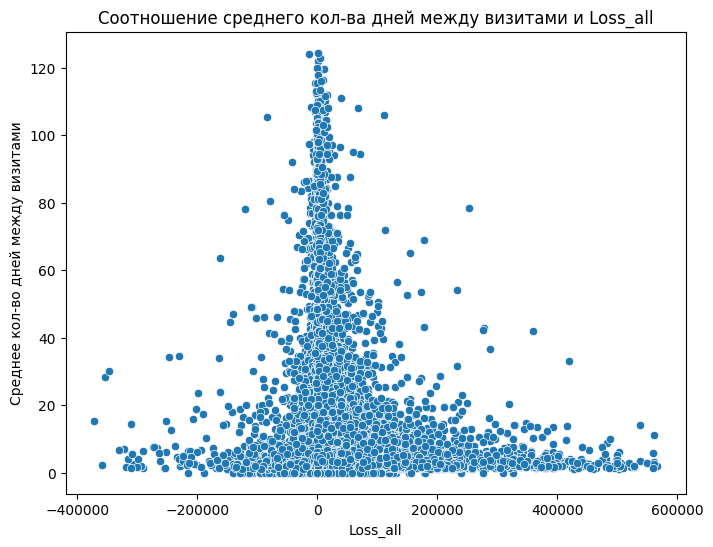

In [ ]:
# Создаем объект для scatter plot
fig, ax = plt.subplots(figsize=(8,6))

# Задаем данные и параметры для построения графика
sns.scatterplot(data=df, y='avg_days', x='Loss_all', ax=ax)

# Называем оси графика
ax.set_ylabel('Среднее кол-во дней между визитами')
ax.set_xlabel('Loss_all')
#Добавляем заголовок
ax.set_title('Соотношение среднего кол-ва дней между визитами и Loss_all')
plt.show;

В финальном разделе я бы хотел провести исследование возвращаемость клиента после регстр. и как на это влияет фактор Bet_bonus_1st.
И в самом конце сделаем сегментацию клиентов на основе их визитов,сумме депозитов, частоте и тп. Возможно эта информация поможет для работы уже непосредственно маркетологам для работы с лояльными , новыми и др. нашими клиентами.:

In [ ]:
df[(df['visits_count'] >= 2)]['ID'].count()
# столько клиентов для которых можно выяснить, как скоро они возвращаются после регстр

23412

In [ ]:
df_ret =  df[(df['visits_count'] >= 2)].round(2)

In [ ]:
df_ret.sample(4)

,ID,Loss_1st,IN_1st,Bet_Bonus_1st,Deposit_1st,withdrawal_1st,ID_club_1st,1st_visit_day,2nd_visit_day,last_visit_day,visits_count,Loss_all,Loss_expected,avg_days
23674,2433235654,1080.0,3504.0,500,1440.0,360.0,1610,2020-10-11,2020-10-12 00:00:00,2021-01-03 00:00:00,4,660.00,366.59,28.00
10177,2458962381,4185.0,9222.5,450,4185.0,0.0,1663,2020-08-25,2020-09-02 00:00:00,2021-03-10 00:00:00,4,4874.75,4580.64,65.67
39950,2450757168,120.0,120.0,0,120.0,0.0,1661,2021-03-01,2021-03-13 00:00:00,2021-03-14 00:00:00,2,192.00,60.00,6.50
26604,2431209007,600.0,600.0,450,600.0,0.0,1153,2020-12-06,2020-12-07 00:00:00,2021-01-02 00:00:00,5,342.00,2997.81,6.75


In [ ]:
df_ret['come_back_day'] = (pd.to_datetime(df_ret['2nd_visit_day']) - pd.to_datetime(df_ret['1st_visit_day']))
# добавим колонку с разницей между первым и вторым посещениями

In [ ]:
all_cbd = df_ret['come_back_day'].mean().round('H')
bonus_cbd = df_ret.loc[df_ret['Bet_Bonus_1st'] == 0, 'come_back_day'].mean().round('H')
no_bonus_cbd = df_ret.loc[df_ret['Bet_Bonus_1st'] != 0, 'come_back_day'].mean().round('H')
print(f'Среднee время между первым и вторым посещениями для всех клиентов {all_cbd}')
print(f'Среднee время между первым и вторым посещениями для Bet_bonus_1s {bonus_cbd}')
print(f'Среднee время между первым и вторым посещениями для НЕ Bet_bonus_1s {no_bonus_cbd}')

Среднee время между первым и вторым посещениями для всех клиентов 11 days 09:00:00
Среднee время между первым и вторым посещениями для Bet_bonus_1s 11 days 08:00:00
Среднee время между первым и вторым посещениями для НЕ Bet_bonus_1s 11 days 09:00:00


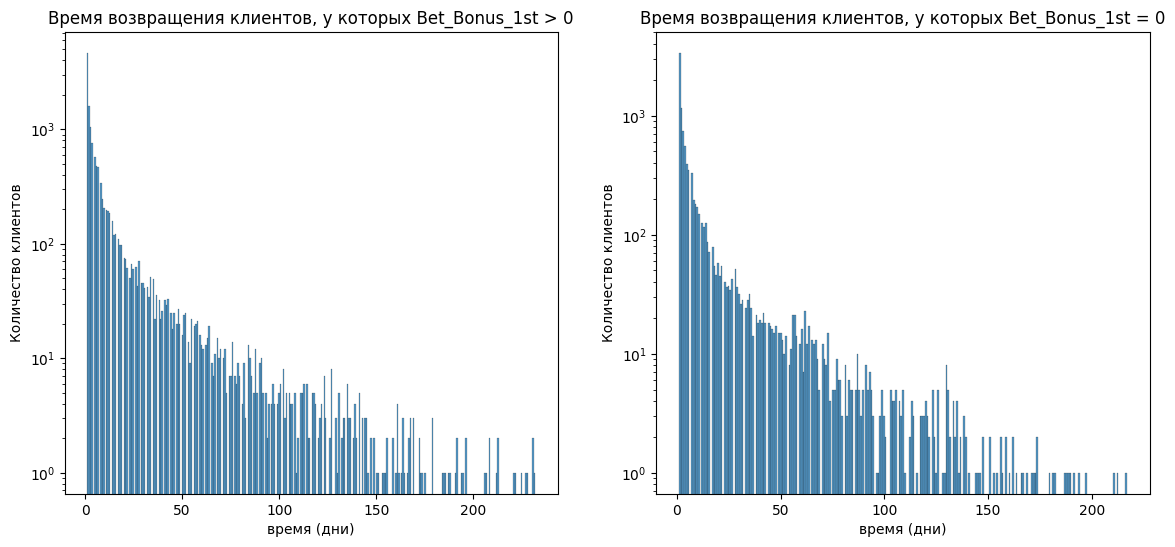

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

sns.histplot(data=df_ret.loc[df_ret['Bet_Bonus_1st'] != 0, 'come_back_day'].apply(lambda x: x.days), ax=ax1)
ax1.set_title("Время возвращения клиентов, у которых Bet_Bonus_1st > 0")
ax1.set_xlabel("время (дни)")
ax1.set_ylabel("Количество клиентов")
ax1.set_yscale('log')

sns.histplot(data=df_ret.loc[df_ret['Bet_Bonus_1st'] == 0, 'come_back_day'].apply(lambda x: x.days), ax=ax2)
ax2.set_title("Время возвращения клиентов, у которых Bet_Bonus_1st = 0")
ax2.set_xlabel("время (дни)")
ax2.set_ylabel("Количество клиентов")
ax2.set_yscale('log') 

plt.show();
# Распределения одинковы как и среднее время для обеих категорий.

In [ ]:
# Из предыдущих вычеслений можно сделать вывод , что использовал клиент или нет Bet bonus разницы никакой.
# Есть такой термин как пародокс Симпсона, когда сумма статистик значиимо не отличается , 
# по фактору, но если их разбить то по отдельности они значимо отличимы.
# Давйте сделаем это с Bet_bonus_1st.

In [ ]:
# Возьмем группы: (0,100], (100,500], (500,1000],(1000,2500],(2500+)
all_cbd = df_ret['come_back_day'].mean().round('H')
bonus_cbd = df_ret.loc[df_ret['Bet_Bonus_1st'] == 0, 'come_back_day'].mean().round('H')
no_bonus_cbd = df_ret.loc[df_ret['Bet_Bonus_1st'] != 0, 'come_back_day'].mean().round('H')
bonus_cbd_100 = df_ret.loc[(df_ret['Bet_Bonus_1st'] <= 100) & (df_ret['Bet_Bonus_1st'] != 0), 'come_back_day'].mean().round('H')
bonus_cbd_100_500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 100) & (df_ret['Bet_Bonus_1st'] <= 500), 'come_back_day'].mean().round('H')
bonus_cbd_500_1000 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 500) & (df_ret['Bet_Bonus_1st'] <= 1000), 'come_back_day'].mean().round('H')
bonus_cbd_1000_2500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 1000) & (df_ret['Bet_Bonus_1st'] <= 2500), 'come_back_day'].mean().round('H')
bonus_cbd_2500 = df_ret.loc[df_ret['Bet_Bonus_1st'] > 2500, 'come_back_day'].mean().round('H')

print(f'Среднее время между первым и вторым посещениями для всех клиентов: {all_cbd}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st: {bonus_cbd}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st <= 100: {bonus_cbd_100}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 100 и <= 500: {bonus_cbd_100_500}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 500 и <= 1000: {bonus_cbd_500_1000}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 1000 и <= 2500: {bonus_cbd_1000_2500}')
print(f'Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 2500: {bonus_cbd_2500}')
# почти в 2 раза чаще  к нам возвращаются клиенты из категории Bet_bonus_1s > 2500 , по сравнению с "коллегам" из категории  Bet_bonus_1st

Среднее время между первым и вторым посещениями для всех клиентов: 11 days 09:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st: 11 days 08:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st <= 100: 9 days 05:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 100 и <= 500: 11 days 22:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 500 и <= 1000: 9 days 04:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 1000 и <= 2500: 9 days 01:00:00
Среднee время между первым и вторым посещениями для клиентов с Bet_bonus_1st > 2500: 6 days 07:00:00


In [ ]:
all_avgd = df_ret['avg_days'].mean().round(2)
bonus_avgd = df_ret.loc[df_ret['Bet_Bonus_1st'] == 0, 'avg_days'].mean().round(2)
no_bonus_avgd = df_ret.loc[df_ret['Bet_Bonus_1st'] != 0, 'avg_days'].mean().round(2)
bonus_avgd_100 = df_ret.loc[(df_ret['Bet_Bonus_1st'] <= 100) & (df_ret['Bet_Bonus_1st'] != 0), 'avg_days'].mean().round(2)
bonus_avgd_100_500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 100) & (df_ret['Bet_Bonus_1st'] <= 500), 'avg_days'].mean().round(2)
bonus_avgd_500_1000 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 500) & (df_ret['Bet_Bonus_1st'] <= 1000), 'avg_days'].mean().round(2)
bonus_avgd_1000_2500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 1000) & (df_ret['Bet_Bonus_1st'] <= 2500), 'avg_days'].mean().round(2)
bonus_avgd_2500 = df_ret.loc[df_ret['Bet_Bonus_1st'] > 2500, 'avg_days'].mean().round(2)

print(f'Среднее время(дни) между посещениями для всех клиентов: {all_avgd}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st: {bonus_avgd}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st <= 100: {bonus_avgd_100}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 100 и <= 500: {bonus_avgd_100_500}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 500 и <= 1000: {bonus_avgd_500_1000}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 1000 и <= 2500: {bonus_avgd_1000_2500}')
print(f'Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 2500: {bonus_avgd_2500}')
# у группы клиентов с Bet_bonus_1st > 100 и <= 500 , среднee время между посещениями больше всех

Среднее время(дни) между посещениями для всех клиентов: 13.8
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st: 13.65
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st <= 100: 11.74
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 100 и <= 500: 14.53
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 500 и <= 1000: 10.73
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 1000 и <= 2500: 11.73
Среднee время(дни) между посещениями для клиентов с Bet_bonus_1st > 2500: 11.48


In [ ]:
all_loss = df_ret['Loss_all'].sum()
bonus_loss = df_ret.loc[df_ret['Bet_Bonus_1st'] == 0, 'Loss_all'].sum()
no_bonus_loss = df_ret.loc[df_ret['Bet_Bonus_1st'] != 0, 'Loss_all'].sum()
bonus_loss_100 = df_ret.loc[(df_ret['Bet_Bonus_1st'] <= 100) & (df_ret['Bet_Bonus_1st'] != 0), 'Loss_all'].sum()
bonus_loss_100_500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 100) & (df_ret['Bet_Bonus_1st'] <= 500), 'Loss_all'].sum()
bonus_loss_500_1000 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 500) & (df_ret['Bet_Bonus_1st'] <= 1000), 'Loss_all'].sum()
bonus_loss_1000_2500 = df_ret.loc[(df_ret['Bet_Bonus_1st'] > 1000) & (df_ret['Bet_Bonus_1st'] <= 2500), 'Loss_all'].sum()
bonus_loss_2500 = df_ret.loc[df_ret['Bet_Bonus_1st'] > 2500, 'Loss_all'].sum()

print(f'Общие проигрышы за все визиты на всех клиентах: {(all_loss*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах без Bet_bonus_1st: {(bonus_loss*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах с Bet_bonus_1st <= 100: {(bonus_loss_100*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 100 и <= 500: {(bonus_loss_100_500*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 500 и <= 1000: {(bonus_loss_500_1000*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 1000 и <= 2500: {(bonus_loss_1000_2500*1e-6).round(2)} млн.руб.')
print(f'Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 2500: {(bonus_loss_2500*1e-6).round(2)} млн.руб.')
# как видно клиенты категории Bet_bonus_1st > 100 и <= 500 приносят основной доход, возможно маркетолагам работать с этой группой. 

Общие проигрышы за все визиты на всех клиентах: 570.02 млн.руб.
Общие проигрышы за все визиты на клиентах без Bet_bonus_1st: 301.02 млн.руб.
Общие проигрышы за все визиты на клиентах с Bet_bonus_1st <= 100: 3.6 млн.руб.
Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 100 и <= 500: 227.23 млн.руб.
Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 500 и <= 1000: 31.41 млн.руб.
Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 1000 и <= 2500: 3.76 млн.руб.
Общие проигрышы за все визиты на клиентах с Bet_bonus_1st > 2500: 3.01 млн.руб.


In [ ]:
df.columns

Index(['ID', 'Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st',
       'withdrawal_1st', 'ID_club_1st', '1st_visit_day', '2nd_visit_day',
       'last_visit_day', 'visits_count', 'Loss_all', 'Loss_expected',
       'avg_days'],
      dtype='object')

In [ ]:
# Используем МЛ алгоритм kmeans для сегментации клинетов, а именно кластеризуем их по отдельным колонкам, выдадим скор внутри каждой.
# пример: в колонке IN_1st используем кластеризацию затем для клентов кластера с большими значениями выдадим макс скор от кол-во кластеров и так по каждой колонке 

In [ ]:
df_seg = df[['Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st',
       'withdrawal_1st', 'visits_count', 'Loss_all', 'Loss_expected', 'avg_days']] # колонки для сегментации 
n_clusters = 5 
# У нас получается 9 колонок по 5 кластеров , то есть 45 очков может получить наш самый лучший клиент 

In [ ]:
from sklearn.cluster import KMeans

columns = ['Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st', 'visits_count', 'Loss_all', 'Loss_expected']
columns2 = ['withdrawal_1st', 'avg_days'] 
n_clusters = 5 # число кластеров для каждой колонки

for col in columns:
    # кластеризуем клиентов по текущей колонке
    X = df[col].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    
    # определяем кластер для каждого клиента и сохраняем в df
    df[f'{col}_cluster'] = kmeans.predict(X)
    
    # считаем скор для каждого кластера
    cluster_scores = {}
    for cluster in range(n_clusters):
        cluster_df = df[df[f'{col}_cluster'] == cluster]
        if col == 'withdrawal_1st' or col == 'avg_days':
            score = 5 - cluster if cluster != 0 else 1
        else:
            score = cluster + 1
        cluster_scores[cluster] = score
    # присваиваем скор клиентам в df
    df[f'{col}_score'] = df[f'{col}_cluster'].map(cluster_scores)

for col in columns2:
    # кластеризуем клиентов по текущей колонке
    X = df[col].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    
    # определяем кластер для каждого клиента и сохраняем в df
    df[f'{col}_cluster'] = kmeans.predict(X)
    
    # считаем скор для каждого кластера
    cluster_scores = {}
    for cluster in range(n_clusters):
        cluster_df = df[df[f'{col}_cluster'] == cluster]
        score = 5 - cluster if cluster != 0 else 1
        cluster_scores[cluster] = score
    # присваиваем скор клиентам в df
    df[f'{col}_score'] = df[f'{col}_cluster'].map(cluster_scores)

score_cols = [f'{col}_score' for col in columns]
df['Score_client'] = df[score_cols].sum(axis=1)


In [ ]:
df.columns

Index(['ID', 'Loss_1st', 'IN_1st', 'Bet_Bonus_1st', 'Deposit_1st',
       'withdrawal_1st', 'ID_club_1st', '1st_visit_day', '2nd_visit_day',
       'last_visit_day', 'visits_count', 'Loss_all', 'Loss_expected',
       'avg_days', 'Loss_1st_cluster', 'Loss_1st_score', 'IN_1st_cluster',
       'IN_1st_score', 'Bet_Bonus_1st_cluster', 'Bet_Bonus_1st_score',
       'Deposit_1st_cluster', 'Deposit_1st_score', 'visits_count_cluster',
       'visits_count_score', 'Loss_all_cluster', 'Loss_all_score',
       'Loss_expected_cluster', 'Loss_expected_score',
       'withdrawal_1st_cluster', 'withdrawal_1st_score', 'avg_days_cluster',
       'avg_days_score', 'Score_client'],
      dtype='object')

In [ ]:
df['Score_client'].sample(4)# теперь мы можем сразу оперделить "хороший" или "плохой" клиент по его скору

20429    12
55256     7
43308     8
15725    12
Name: Score_client, dtype: int64

Вывод: Данные были почти без пропусков, изменили тип данных, округлили, добавили колонки разницей между визитам, и их ср. значениями.
Затем посмотрели на топы лучших клубов, распределения клиентов в зависимости от депозитов и кол-ва визитов, выяснили какие клиенты пришли c Bet_Bonus_1st, а какие нет , посчитали для этих категорий клиентов сколько в среднем доход, убыток, частота визитов, среднее время между визитами и тд. Как часто в среднем возвращаются клиенты после первого визита и в итоге провели сегментацию клиентов с помощью Kmeans , выдали суммарный score каждому клиенты на основе их кластеров внутри каждой колонки.

P.S. Этот анализ проводился впервую очередь, показать уровень моих возможностей в 
анализе данных, возможно многие гипотезы не были проверены или отвергнуты, но факт что у меня был только weekend, поэтому не серчайте.  
P.S.S. В графиках я часто использовал scale('log') для более презентабелности графиков, как я уже говорил, я делал больше уклон на презентабельность а не на точность.